In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp
import Time_approximations as Ta
from functools import partial
from scipy.integrate import quad

from singlelocusmodelextended import SingleLocusModelExt
modelext = SingleLocusModelExt(k=1)

In [3]:
array_csv=np.loadtxt('posterior_samples.csv', delimiter=",", skiprows=1, usecols=(1,2,3,4,5) , dtype='Float64',)

In [5]:
def simTP(μ, δ, w1, w2, w3, repetition=50, max_gen=5e6, seed=10, fixation=0.999):
    return modelext.run_simulations(6.425e6, μ, δ, δ,
 w1, w2, w3, repetitions=50, max_gen=5e4 ,seed=seed, clonal_intf=True, fixation=fixation)

In [64]:
f_sim_1=simTP(*array_csv[13])

In [68]:
f_sim_1[2]

(array([], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype=int64))

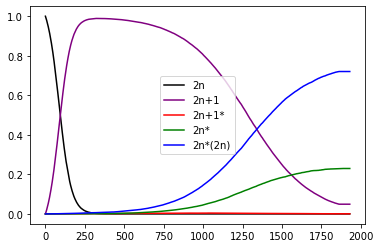

In [168]:
modelext.plot_progress(np.array(f_sim_1[1]), 22, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99)

In [3]:
 μ, δ, w_euwt, w_anwt, w_anmt, w_eumt = 9.6e-08, 5.4e-4, 1, 1.021, 1.025, 1.028

In [4]:
sim0=modelext.run_simulations(6.425e6, μ, δ, δ, 
 w_anwt, w_anmt, w_eumt, repetitions=50, max_gen=5e4 , seed=1, fixation=.99)

In [5]:
sim1=modelext.run_simulations_time(6.425e6, μ, δ, δ,
 w_anwt, w_anmt, w_eumt, repetitions=50, max_gen=5e4 ,seed=1, fixation=.99)

In [6]:
sim0[0]==sim1[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [7]:
sim0[2], sim1[1]

((array([28], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        dtype=int64)),
 (array([28], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        dtype=int64)))

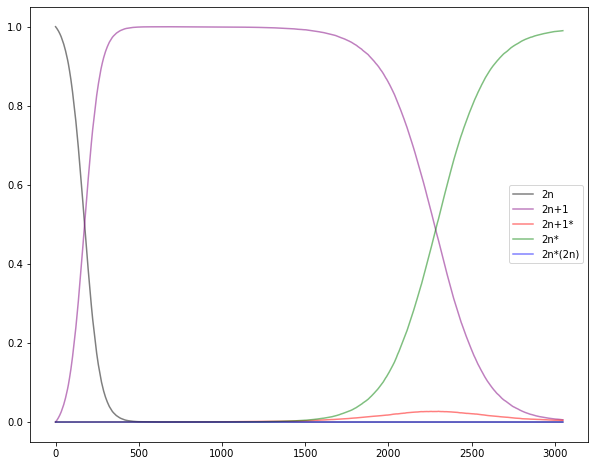

In [8]:
modelext.plot_progress(np.array(sim0[1]), 32, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.5);

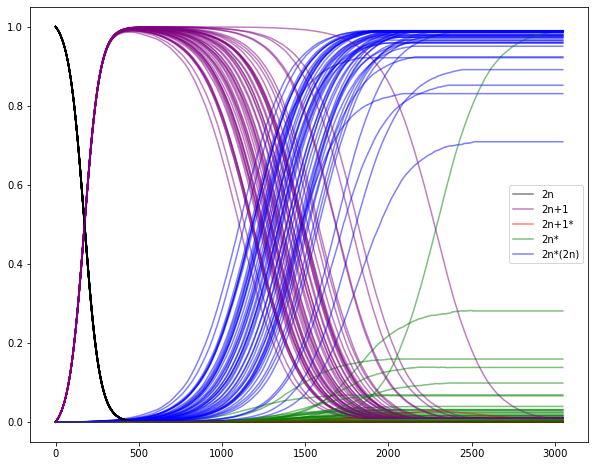

In [9]:
ax=modelext.plot_progress(np.array(sim0[1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.5 )
[modelext.plot_progress(np.array(sim0[1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.5, legend=False) for x in range(1,50)];

In [3]:
idx = np.random.choice(np.shape(array_csv)[0], size=100, replace=True)
array_csv[idx]

array([[3.72290930e-06, 2.68264809e-03, 1.02122879e+00, 1.02163392e+00,
        1.02698513e+00],
       [8.43842701e-06, 2.18079907e-03, 1.02093131e+00, 1.02508236e+00,
        1.02603053e+00],
       [8.90456157e-06, 3.50119808e-03, 1.02066214e+00, 1.02430595e+00,
        1.02616563e+00],
       [1.62427786e-06, 2.34040871e-03, 1.02353038e+00, 1.02496931e+00,
        1.03014134e+00],
       [9.79629685e-06, 3.51320377e-03, 1.02098896e+00, 1.02221347e+00,
        1.02610642e+00],
       [5.44959028e-07, 8.32383508e-04, 1.02398356e+00, 1.02581072e+00,
        1.03016005e+00],
       [5.10654991e-07, 1.51683051e-03, 1.01980900e+00, 1.02285107e+00,
        1.02650242e+00],
       [1.01174800e-05, 3.02658376e-03, 1.01947190e+00, 1.02218857e+00,
        1.02425050e+00],
       [1.08774972e-05, 2.95919753e-03, 1.02099176e+00, 1.02315148e+00,
        1.02616266e+00],
       [7.65302990e-06, 2.45872197e-03, 1.02185005e+00, 1.02462227e+00,
        1.02697785e+00],
       [2.17753280e-06, 2.0952

In [6]:
sim_sam100P=np.array([simTP(*a) for a in array_csv[idx]])

<ipython-input-6-473e11b983e1>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sim_sam100P=np.array([simTP(*a) for a in array_csv[idx]])


In [4]:
np.save('sim_sam100P',(idx,array_csv[idx],np.array(sim_sam100P, dtype=object).T))

NameError: name 'idx' is not defined

In [5]:
idxs, paras, sim_sam100P = np.load('sim_sam100P.npy',allow_pickle=True)
sim_sam100P=sim_sam100P.T

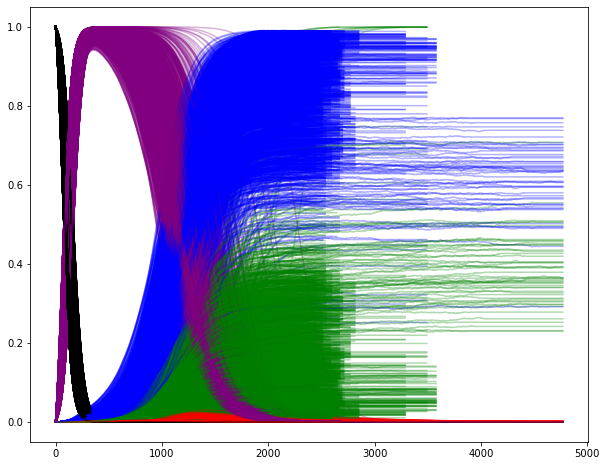

In [8]:
idxplot = np.random.choice(100, size=50, replace=False)
ax=modelext.plot_progress(np.array(sim_sam100P[0,1]), 0, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, alpha=.3, legend=False)
[[modelext.plot_progress(np.array(sim_sam100P[y,1]), x, ['2n','2n+1','2n+1*','2n*','2n*(2n)'], ['black','purple','red','green','blue'],fixation=0.99, ax=ax, alpha=.3, legend=False) for x in range(50)] for y in idxplot]
plt.savefig('progress5x50x50.pdf');

In [9]:
sim_sam100P[0,0]

array([2397., 2414., 2385., 2443., 2426., 2402., 2410., 2445., 2413.,
       2420., 2475., 2350., 2420., 2430., 2427., 2457., 2491., 2339.,
       2405., 2357., 2453., 2468., 2357., 2408., 2366., 2446., 2411.,
       2388., 2418., 2465., 2357., 2490., 2393., 2411., 2468., 2500.,
       2535., 2484., 2442., 2401., 2432., 2399., 2432., 2417., 2374.,
       2402., 2361., 2454., 2349., 2392.])